In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [367]:
a = 1.
dt = .1
Nx = 100
Ny = 50
dx = 1./Nx
mu = a * dt / (dx**2)

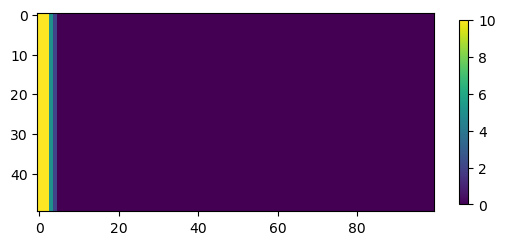

In [368]:
#def init(x, y):
#    return -2*((x-.5)**2 + (y-.5)**2)
X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, .5, Ny))
U = np.zeros(X.shape)
U[:,:3] = 10.
U[:,3]  = 5.
U[:,4]  = 2.
init = plt.imshow(U, cmap='viridis')
plt.colorbar(init, ax=plt.gca(), shrink=.5)

In [369]:
# Construct sparce matrices
A = -mu/2 * sp.identity(Ny)
B = sp.diags([
    np.ones(Ny) * (1+2*mu),
    np.ones(Ny) * (-mu/2),
    np.ones(Ny) * (-mu/2)
], offsets=[0,1,-1])

In [370]:
LHS = sp.bmat([
    [B if i==j else A if abs(i-j)==1 else None for j in range(Nx)]
    for i in range(Nx)]
)

In [371]:
# Construct sparce matrices
Br = sp.diags([
    np.ones(Ny) * (1-2*mu),
    np.ones(Ny) * (mu/2),
    np.ones(Ny) * (mu/2)
], offsets=[0,1,-1])

In [372]:
RHS = sp.bmat([
    [Bl if i==j else -A if abs(i-j)==1 else None for j in range(Nx)]
    for i in range(Nx)]
)

In [373]:
print(RHS.toarray()[:10,:10])

[[-1999.   500.     0.     0.     0.     0.     0.     0.     0.     0.]
 [  500. -1999.   500.     0.     0.     0.     0.     0.     0.     0.]
 [    0.   500. -1999.   500.     0.     0.     0.     0.     0.     0.]
 [    0.     0.   500. -1999.   500.     0.     0.     0.     0.     0.]
 [    0.     0.     0.   500. -1999.   500.     0.     0.     0.     0.]
 [    0.     0.     0.     0.   500. -1999.   500.     0.     0.     0.]
 [    0.     0.     0.     0.     0.   500. -1999.   500.     0.     0.]
 [    0.     0.     0.     0.     0.     0.   500. -1999.   500.     0.]
 [    0.     0.     0.     0.     0.     0.     0.   500. -1999.   500.]
 [    0.     0.     0.     0.     0.     0.     0.     0.   500. -1999.]]


In [374]:
u = U.flatten(order='F')
sols = [U]
for i in range(int(10/dt)):
    u = sp.linalg.spsolve(LHS, RHS@u)
    if i%10==1:
        sols.append( u.reshape(U.shape, order='F'))

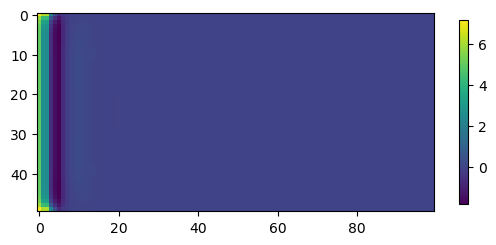

In [375]:
sol = plt.imshow(u.reshape(U.shape, order='F'), cmap='viridis')
fig.colorbar(sol, ax=plt.gca(), shrink=.5)
plt.show()

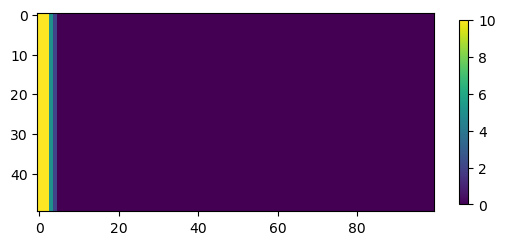

In [376]:
init = plt.imshow(U, cmap='viridis')
fig.colorbar(init, ax=plt.gca(), shrink=.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(subplot)

In [296]:
def plot_solutions():
    N = sols[0].shape[0]-1
    X, Y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
    fig = plt.figure(figsize=(10,10))
    # Orders the subplots nicely through matplotlib hacks
    ax_dict = fig.subplot_mosaic(
        [
            ['c0'  , 'c2'  , 'c4'],
            ['c6'  , 'c8'  , 'c10']
        ]
    )
    fig.suptitle(
        f'5 step convergence for Crank Nicholson diffusion',
        fontsize=16, fontweight='bold'
    )
    for name, ax in ax_dict.items():
        if name != 'conv':
            ss = ax.get_subplotspec()                    # type: ignore
            ax.remove()
            ax = fig.add_subplot(ss, projection='3d')
            cycles = int(name[1:])
            ax.plot_surface(X, Y, sols[cycles])           # type: ignore
            ax.set_title(f'{cycles} steps', fontweight='bold')
    plt.show()

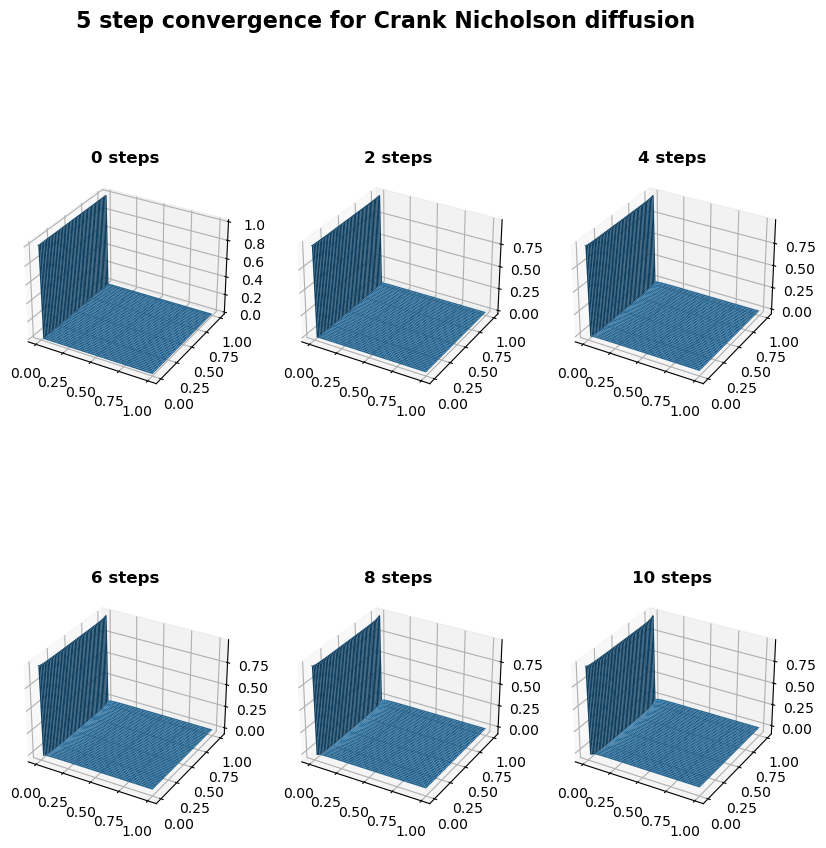

In [242]:
plot_solutions()

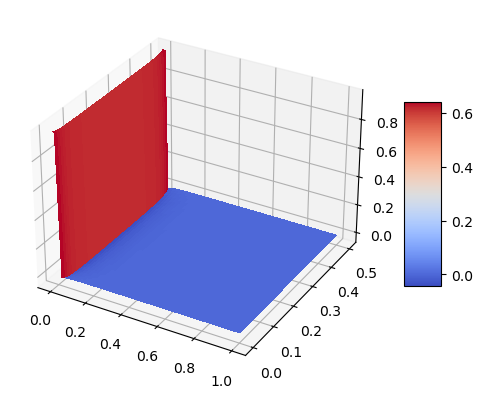

In [243]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, sols[6], cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

(5000, 5000)
(50, 50)


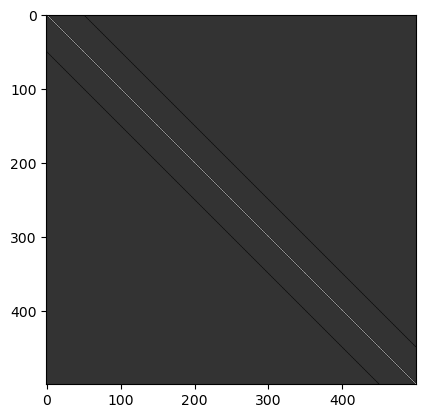

In [233]:
plt.imshow(RHS.toarray()[:500,:500], cmap="gray")
print(RHS.shape)
print(B.shape)

In [208]:
def plot_imshows():
    N = sols[0].shape[0]-1
    #X, Y = np.meshgrid(np.linspace(0,1,N+1), np.linspace(0,1,N+1))
    fig = plt.figure(figsize=(10,10))
    # Orders the subplots nicely through matplotlib hacks
    ax_dict = fig.subplot_mosaic(
        [
            ['c0'  , 'c2'  , 'c4'],
            ['c6'  , 'c8'  , 'c10']
        ]
    )
    fig.suptitle(
        f'5 step convergence for Crank Nicholson diffusion',
        fontsize=16, fontweight='bold'
    )
    for name, ax in ax_dict.items():
        if name != 'conv':
            #ss = ax.get_subplotspec()                    # type: ignore
            #ax.remove()
            #ax = fig.add_subplot(ss, projection='3d')
            cycles = int(name[1:])
            ax.imshow(sols[cycles])           # type: ignore
            ax.set_title(f'{cycles} steps', fontweight='bold')
    plt.show()

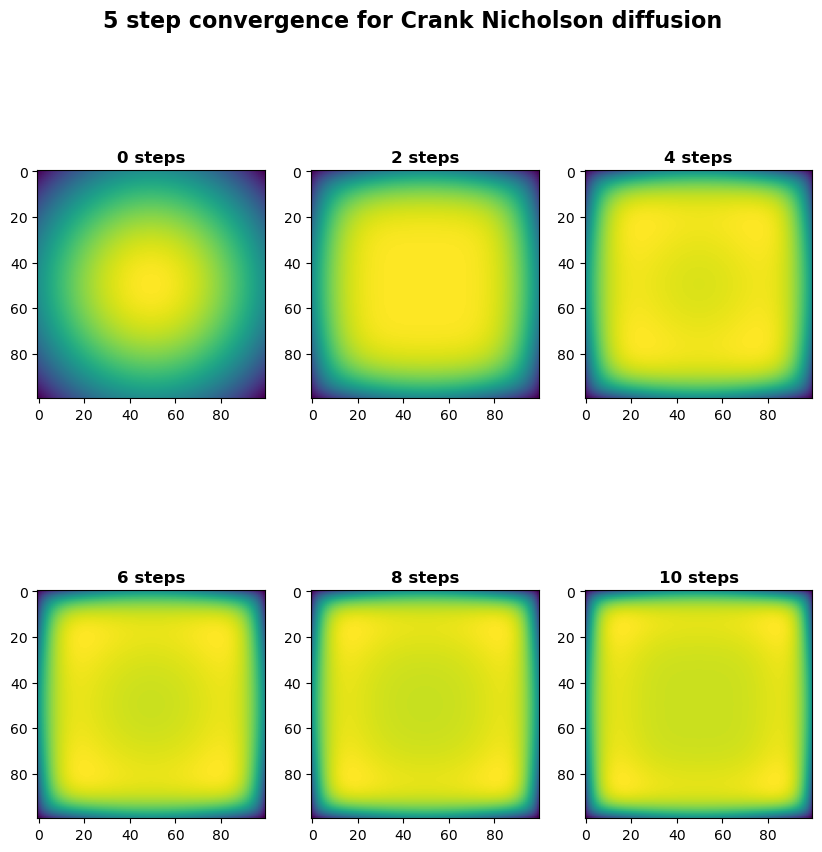

In [209]:
plot_imshows()

In [222]:
test = np.array([[1,2,3],[4,5,6]])
print(test)
print()
flattest = test.flatten(order="F")
print(flattest)
print()
print(flattest.reshape(test.shape, order='F'))

[[1 2 3]
 [4 5 6]]

[1 4 2 5 3 6]

[[1 2 3]
 [4 5 6]]


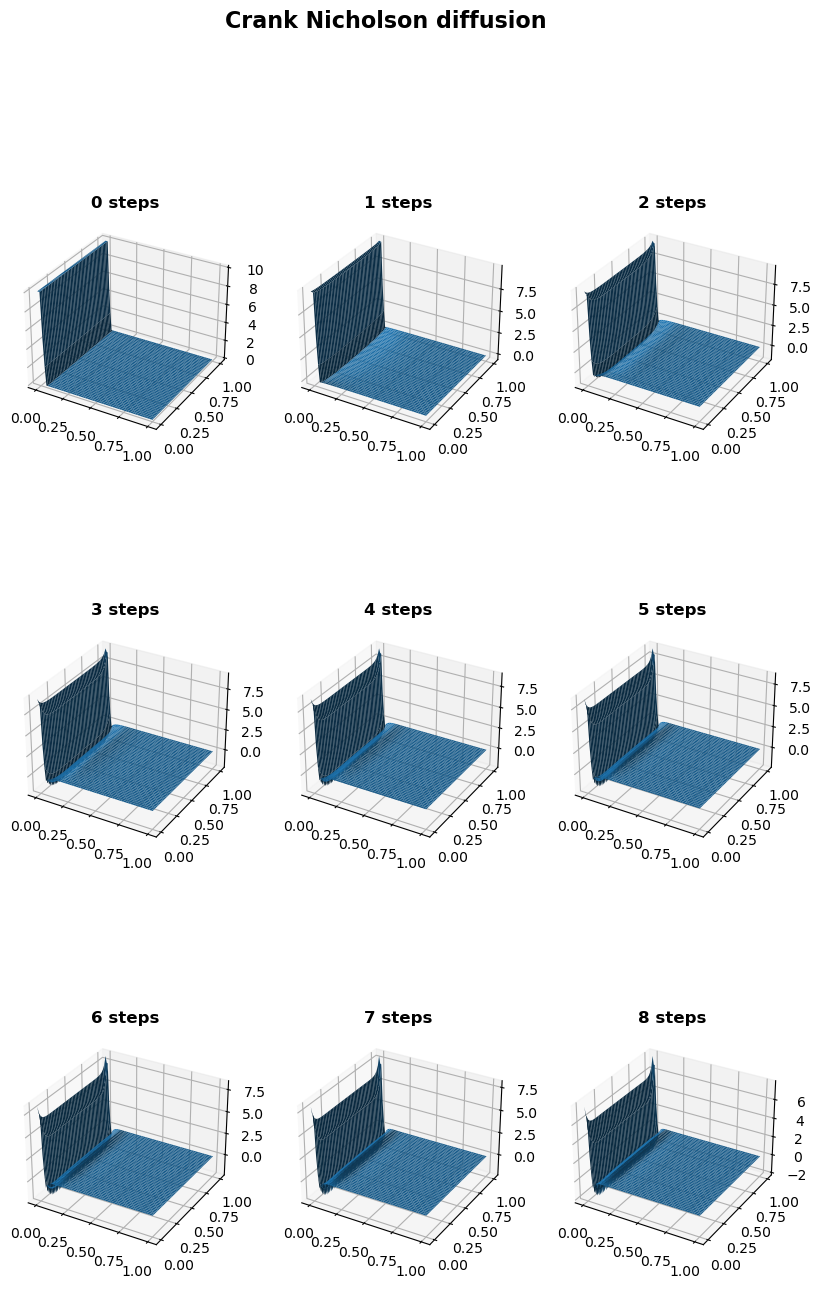

In [346]:
fig = plt.figure(figsize=(10,15))
# Orders the subplots nicely through matplotlib hacks
X, Y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
ax_dict = fig.subplot_mosaic(
    [
        ['c0'  , 'c1'  , 'c2'],
        ['c3'  , 'c4'  , 'c5'],
        ['c6'  , 'c7'  , 'c8'],
    ]
)
fig.suptitle(
    f'Crank Nicholson diffusion',
    fontsize=16, fontweight='bold'
)
i = 0
for name, ax in ax_dict.items():
    ss = ax.get_subplotspec()                    # type: ignore
    ax.remove()
    ax = fig.add_subplot(ss, projection='3d')
    cycles = int(name[1:])
    ax.plot_surface(X, Y, sols[i])           # type: ignore
    ax.set_title(f'{cycles} steps', fontweight='bold')
    i += 1